# Executive summary

Summary of this notebook

ES TBD

# Assumptions

## Classical Assumptions of Ordinary Least Squares

1. Regression is linear in parameters & correctly specified
2. The error terms are normally distributed and zero population mean
3. The error term has constant variance $Var({\epsilon_i})={\sigma^2}$ for every i (no heteroskedasticity)
4. Errors are uncorrelated across observations: $cov({\epsilon_i},{\epsilon_j})=0$ for two observations i and j (no serial correlation)
5. No independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

## Assumption analysis with my project

1. Note
1. Yes, after adjusting. Checked with pair plot
1. Note
1. Yes, Durbin-Watson close to 2
1. No perfect multi-collinearity


# Setup

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import unicodedata
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Manipulation

In [2]:
# Data frame from web scraping
df = pd.read_pickle('result_mod.pkl')

In [3]:
df.sample(5)

,State,Overall_score,Quality_rank,Safety_rank,Salary,Income,Budget,Number_of_incarceration,Percent_SMI,Percent_poverty,Overall_score_H,Percent_married,log_percent_SMI,log_incarceration,log_salary,log_budget,log_income
16,Utah,55.95,24,17,47244,62912,6500,620,6.2,11.8,61.56,57,1.824549,6.429719,10.763081,8.779557,11.049492
8,Iowa,61.06,11,9,55443,54736,10669,530,4.9,12.3,66.62,51,1.589235,6.272877,10.923111,9.275098,10.910277
35,Georgia,47.32,36,38,54602,51244,9201,1220,4.1,18.4,44.89,39,1.410987,7.106606,10.907826,9.127067,10.844354
19,NorthDakota,54.67,17,23,51618,60557,12357,470,3.6,11.1,61.05,49,1.280934,6.152733,10.851626,9.421978,11.011340
38,Arizona,40.91,48,25,47403,51492,7527,1090,4.2,18.2,53.52,41,1.435085,6.993933,10.766441,8.926252,10.849182


In [4]:
df['log_log_salary']=np.log(df.log_salary)


In [5]:
df.corr()

,Overall_score,Quality_rank,Safety_rank,Salary,Income,Budget,Number_of_incarceration,Percent_SMI,Percent_poverty,Overall_score_H,Percent_married,log_percent_SMI,log_incarceration,log_salary,log_budget,log_income,log_log_salary
Overall_score,1.000000,-0.870543,-0.798956,0.397292,0.559595,0.379418,-0.627074,-0.131972,-0.718104,0.672950,0.704728,-0.120643,-0.619010,0.408091,0.390309,0.586579,0.408969
Quality_rank,-0.870543,1.000000,0.488974,-0.361223,-0.498897,-0.465702,0.616553,-0.027035,0.676407,-0.642890,-0.662595,-0.034926,0.610636,-0.379961,-0.487839,-0.515545,-0.381569
Safety_rank,-0.798956,0.488974,1.000000,-0.202369,-0.405059,-0.138569,0.442733,0.209957,0.539715,-0.504480,-0.484275,0.192594,0.447747,-0.214440,-0.153783,-0.440118,-0.215541
Salary,0.397292,-0.361223,-0.202369,1.000000,0.648897,0.758127,-0.454299,-0.177429,-0.412568,0.310051,0.397297,-0.181829,-0.441029,0.996260,0.741649,0.650667,0.995550
Income,0.559595,-0.498897,-0.405059,0.648897,1.000000,0.602636,-0.551058,-0.365149,-0.851151,0.594387,0.691589,-0.385579,-0.528633,0.657461,0.590733,0.996464,0.657925
Budget,0.379418,-0.465702,-0.138569,0.758127,0.602636,1.000000,-0.517864,-0.214484,-0.510921,0.336213,0.364298,-0.225807,-0.531544,0.761666,0.987415,0.592591,0.761618
Number_of_incarceration,-0.627074,0.616553,0.442733,-0.454299,-0.551058,-0.517864,1.000000,-0.058711,0.692920,-0.771355,-0.746797,-0.040202,0.980900,-0.465845,-0.532297,-0.566055,-0.466733
Percent_SMI,-0.131972,-0.027035,0.209957,-0.177429,-0.365149,-0.214484,-0.058711,1.000000,0.199595,-0.084646,-0.062378,0.993603,-0.061865,-0.170402,-0.225947,-0.359468,-0.169637
Percent_poverty,-0.718104,0.676407,0.539715,-0.412568,-0.851151,-0.510921,0.692920,0.199595,1.000000,-0.751678,-0.834091,0.215854,0.661258,-0.434811,-0.513524,-0.864656,-0.436592
Overall_score_H,0.672950,-0.642890,-0.504480,0.310051,0.594387,0.336213,-0.771355,-0.084646,-0.751678,1.000000,0.792286,-0.105507,-0.751174,0.321140,0.365304,0.619221,0.321960


## Splitting up my 3 different 'y' terms

Break up the Overall_score, Quality_rank, Safety_rank. They are related to each other and quite correlated

In [6]:
df_overall_score = df.drop(['Quality_rank','Safety_rank','log_incarceration','log_percent_SMI','Percent_SMI','Salary','log_salary','Budget','Income'],1)
df_overall_score = df_overall_score.drop(['log_log_salary','log_budget'],1)
df_overall_score = df_overall_score.set_index('State')

In [7]:
df_quality_rank = df.drop(['Overall_score','Safety_rank'],1)
df_quality_rank = df_quality_rank.set_index('State')

In [8]:
df_safety_rank = df.drop(['Quality_rank','Overall_score'],1)
df_safety_rank = df_safety_rank.set_index('State')

In [9]:
df_overall_score.corr()

,Overall_score,Number_of_incarceration,Percent_poverty,Overall_score_H,Percent_married,log_income
Overall_score,1.000000,-0.627074,-0.718104,0.672950,0.704728,0.586579
Number_of_incarceration,-0.627074,1.000000,0.692920,-0.771355,-0.746797,-0.566055
Percent_poverty,-0.718104,0.692920,1.000000,-0.751678,-0.834091,-0.864656
Overall_score_H,0.672950,-0.771355,-0.751678,1.000000,0.792286,0.619221
Percent_married,0.704728,-0.746797,-0.834091,0.792286,1.000000,0.717546
log_income,0.586579,-0.566055,-0.864656,0.619221,0.717546,1.000000


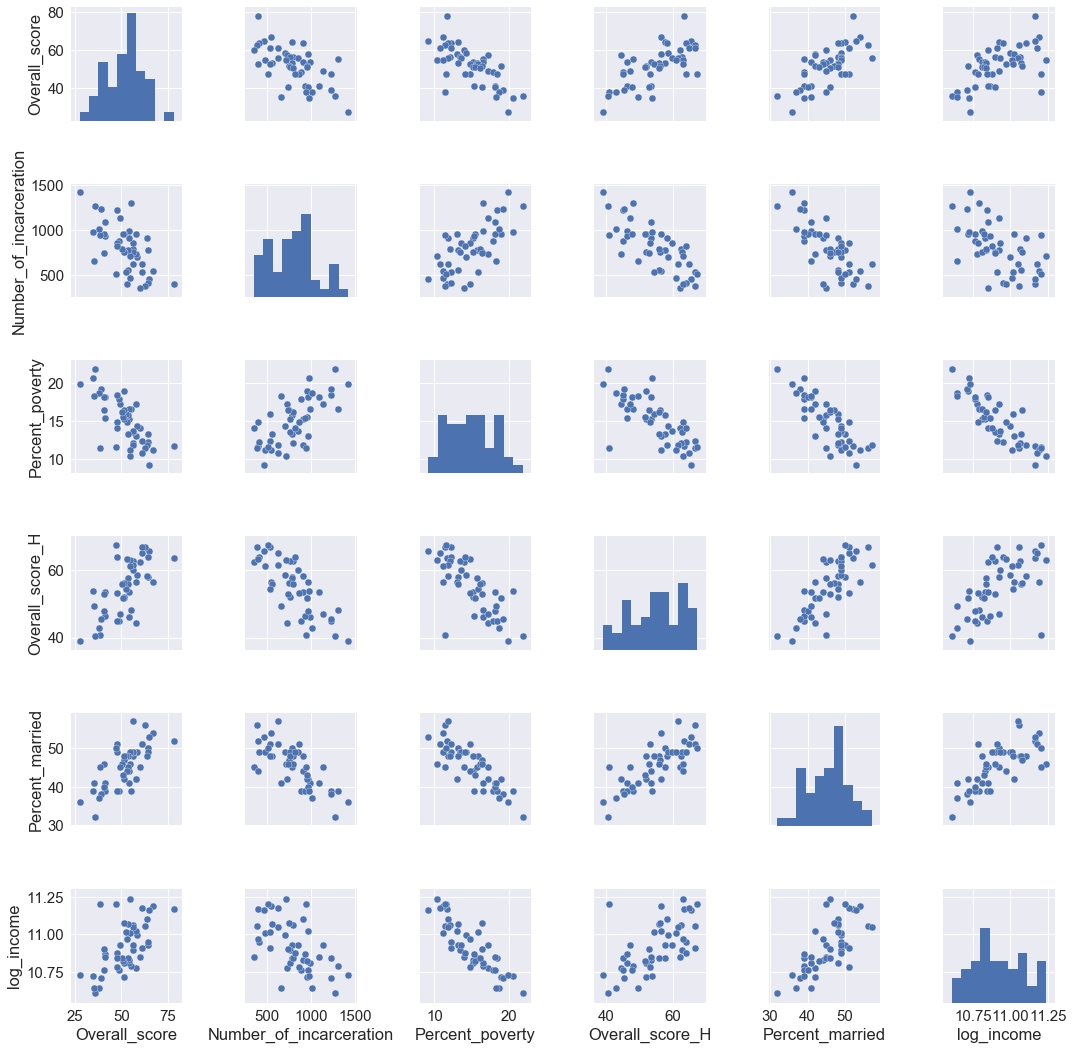

In [10]:
sns.set(font_scale=1.5)
sns.pairplot(df_overall_score)

## Polynomial terms

In [11]:
# test poly interactions and relationships with overall score

p = PolynomialFeatures(degree=2).fit(df_overall_score.drop('Overall_score',1))
features = pd.DataFrame(p.transform(df_overall_score.drop('Overall_score',1)), 
                        index = df_overall_score.index, 
                        columns=p.get_feature_names(df_overall_score.drop('Overall_score',1).columns))
features = features.reset_index(level=0)
features.rename(columns = {'index' : 'State'}, inplace = True)

In [12]:
features = pd.merge(features,df[['Overall_score','State']],on='State')
features.sample(5)

,State,1,Number_of_incarceration,Percent_poverty,Overall_score_H,Percent_married,log_income,Number_of_incarceration^2,Number_of_incarceration Percent_poverty,Number_of_incarceration Overall_score_H,...,Percent_poverty Overall_score_H,Percent_poverty Percent_married,Percent_poverty log_income,Overall_score_H^2,Overall_score_H Percent_married,Overall_score_H log_income,Percent_married^2,Percent_married log_income,log_income^2,Overall_score
31,Texas,1.0,1130.0,17.2,47.11,45.0,10.926891,1276900.0,19436.0,53234.3,...,810.292,774.0,187.942530,2219.3521,2119.95,514.765847,2025.0,491.710107,119.396953,49.15
6,Minnesota,1.0,380.0,11.4,66.62,56.0,11.058606,144400.0,4332.0,25315.6,...,759.468,638.4,126.068111,4438.2244,3730.72,736.724344,3136.0,619.281947,122.292771,62.68
14,Kansas,1.0,760.0,13.5,62.66,49.0,10.894997,577600.0,10260.0,47621.6,...,845.910,661.5,147.082460,3926.2756,3070.34,682.680516,2401.0,533.854856,118.700961,56.24
2,NewHampshire,1.0,460.0,9.2,65.54,53.0,11.160570,211600.0,4232.0,30148.4,...,602.968,487.6,102.677242,4295.4916,3473.62,731.463741,2809.0,591.510197,124.558317,64.65
18,Maryland,1.0,710.0,10.4,63.05,46.0,11.236473,504100.0,7384.0,44765.5,...,655.720,478.4,116.859324,3975.3025,2900.30,708.459650,2116.0,516.877778,126.258335,54.79


In [13]:
#fdf = features.corr().sort_values(by=['Overall_score'])

Make x and y data frames

# Linear Regression - Overall score data

Creating test and train data frames. Save test for the end.

In [14]:
# create a systematic test data frame becuase I have a small data set

system = [4+x*5 for x in range(0,9)]

features_test = features.iloc[system]
features_train = features.drop(system)

features_train = features_train.sample(frac=1).reset_index(drop=True)

In [15]:
y_ttrain = features_train.Overall_score
X_ttrain = features_train.drop(['Overall_score','State'],1)

y_ttest = features_test.Overall_score
X_ttest = features_test.drop(['Overall_score','State'],1)

## OLS analysis

In [16]:
model = sm.OLS(y_ttrain, X_ttrain)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overall_score   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     2.594
Date:                Thu, 26 Apr 2018   Prob (F-statistic):             0.0234
Time:                        13:27:03   Log-Likelihood:                -119.31
No. Observations:                  39   AIC:                             280.6
Df Residuals:                      18   BIC:                             315.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
1                                       -4362.6273   2.47e+04     -0.176      0.862   -5.64e+04    4.76e+04
Number_of_incarceration                     0.3661      1.736      0.211      0.835      -3.281       4.014
Percent_poverty                           -18.0588    241.019     -0.075      0.941    -524.421     488.304
Overall_score_H                            24.8080     71.879      0.345      0.734    -126.205     175.821
Percent_married                           -53.6823    111.751     -0.480      0.637    -288.462     181.097
log_income                                919.8375   4304.038      0.214      0.833   -8122.611    9962.285
Number_of_incarceration^2                2.041e-06   6.89e-05      0.030      0.977      -0.000       0.000
Number_of_incarceration Percent_poverty     0.0004      0.012      0.036      0.972      -0.025       0.026
Number_of_incarceration Overall_score_H     0.0040      0.004      0.891      0.385      -0.005       0.013
Number_of_incarceration Percent_married    -0.0050      0.006     -0.791      0.439      -0.018       0.008
Number_of_incarceration log_income         -0.0331      0.149     -0.221      0.827      -0.347       0.281
Percent_poverty^2                          -0.0216      0.960     -0.023      0.982      -2.039       1.996
Percent_poverty Overall_score_H            -0.2349      0.397     -0.592      0.561      -1.068       0.598
Percent_poverty Percent_married             0.2344      0.878      0.267      0.793      -1.611       2.079
Percent_poverty log_income                  1.6419     18.371      0.089      0.930     -36.954      40.237
Overall_score_H^2                          -0.0349      0.085     -0.411      0.686      -0.213       0.143
Overall_score_H Percent_married             0.1065      0.255      0.417      0.681      -0.430       0.643
Overall_score_H log_income                 -2.3510      5.946     -0.395      0.697     -14.844      10.142
Percent_married^2                          -0.2162      0.179     -1.205      0.244      -0.593       0.161
Percent_married log_income                  6.3134      8.747      0.722      0.480     -12.064      24.691
log_income^2                              -49.9044    194.402     -0.257      0.800    -458.328     358.520
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                2.399
Skew:                           0.430   Prob(JB):                        0.301
Kurtosis:                       3.858   Cond. No.                     1.75e+10
==============================================================================

Warnings:
[1] St

## Ridge analysis

In [17]:
from sklearn.linear_model import Ridge

In [18]:
# ridge = Ridge(alpha=1e-5)

# plt.plot(np.arange(100),np.squeeze(model.coef_))
# plt.plot(np.arange(100),w_true)
# plt.legend(["Estimated","True"])
# plt.show()

# ridge_coef = ridge.fit(X_train, y_train).coef_
# _ = plt.figure(figsize=(40,10))
# _ = plt.plot(range(len(X_train.columns)), ridge_coef)
# _ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
# _ = plt.ylabel('Coefficients')

# plt.show()
# ridge.score(X_test,y_test)

In [19]:
alphas = [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
best_score = -100
new_score = 1

kf = KFold(n_splits = 10,shuffle = True)
for train, test in kf.split(X):
    X_train, X_test = X.iloc[train,:], X.iloc[test,:]
    y_train, y_test = y[train], y[test]
    for i in alphas:
        ridge = Ridge(alpha = i)
        ridge.fit(X_train,y_train)
        new_score = ridge.score(X_test, y_test)
        if new_score > best_score:
            best_score = new_score
            best_alpha = i
print(best_alpha,best_score)

ridge = Ridge(alpha = best_alpha)
ridge_coef = ridge.fit(X_train, y_train).coef_
_ = plt.figure(figsize=(40,10))
_ = plt.plot(range(len(X_train.columns)), ridge_coef)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
_ = plt.ylabel('Coefficients')

plt.show()
ridge.score(X_test,y_test)

NameError: name 'KFold' is not defined

## Lasso analysis

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

In [22]:
alphas = [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
best_score = -100
new_score = 1

kf = KFold(n_splits = 10,shuffle = True)
for train, test in kf.split(X_ttrain,y_ttrain):
    X_train, X_test = X.iloc[train,:], X.iloc[test,:]
    y_train, y_test = y[train], y[test]
    for i in alphas:
        lasso = Lasso(alpha = i)
        lasso.fit(X_train,y_train)
        new_score = lasso.score(X_test, y_test)
        if new_score > best_score:
            best_score = new_score
            best_alpha = i

lasso = Lasso(alpha = best_alpha)
lasso_coef = lasso.fit(X_train, y_train).coef_
_ = plt.figure(figsize=(40,10))
_ = plt.plot(range(len(X_train.columns)), lasso_coef)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
_ = plt.ylabel('Coefficients')

plt.show()
print(best_alpha,best_score,lasso.score(X_test,y_test),sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

NameError: name 'X' is not defined

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [24]:
y_predict = lasso.predict(X_test)

NameError: name 'lasso' is not defined

In [25]:
rms = sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
round(rms,1)

NameError: name 'y_test' is not defined

## Lasso CV analysis

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

## ElasticNet analysis

In [27]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1e-4)
elastic_coef = elastic.fit(x, y).coef_
_ = plt.figure(figsize=(40,10))
_ = plt.plot(range(len(x.columns)), lasso_coef)
_ = plt.xticks(range(len(x.columns)), x.columns, rotation=45)
_ = plt.ylabel('Coefficients')

plt.show()
lasso.score(x,y)

en = ElasticNet(1e-9)
en.fit(X_train,y_train)

en.score(X_test,y_test)

NameError: name 'x' is not defined

## ElasticNetCV analysis

alpha: 2520.48516127747  ratio: 0.99
r^2: 0.5065556224179664 adj r^2: 0.4194772028446664
rmse: 4.401113067451424


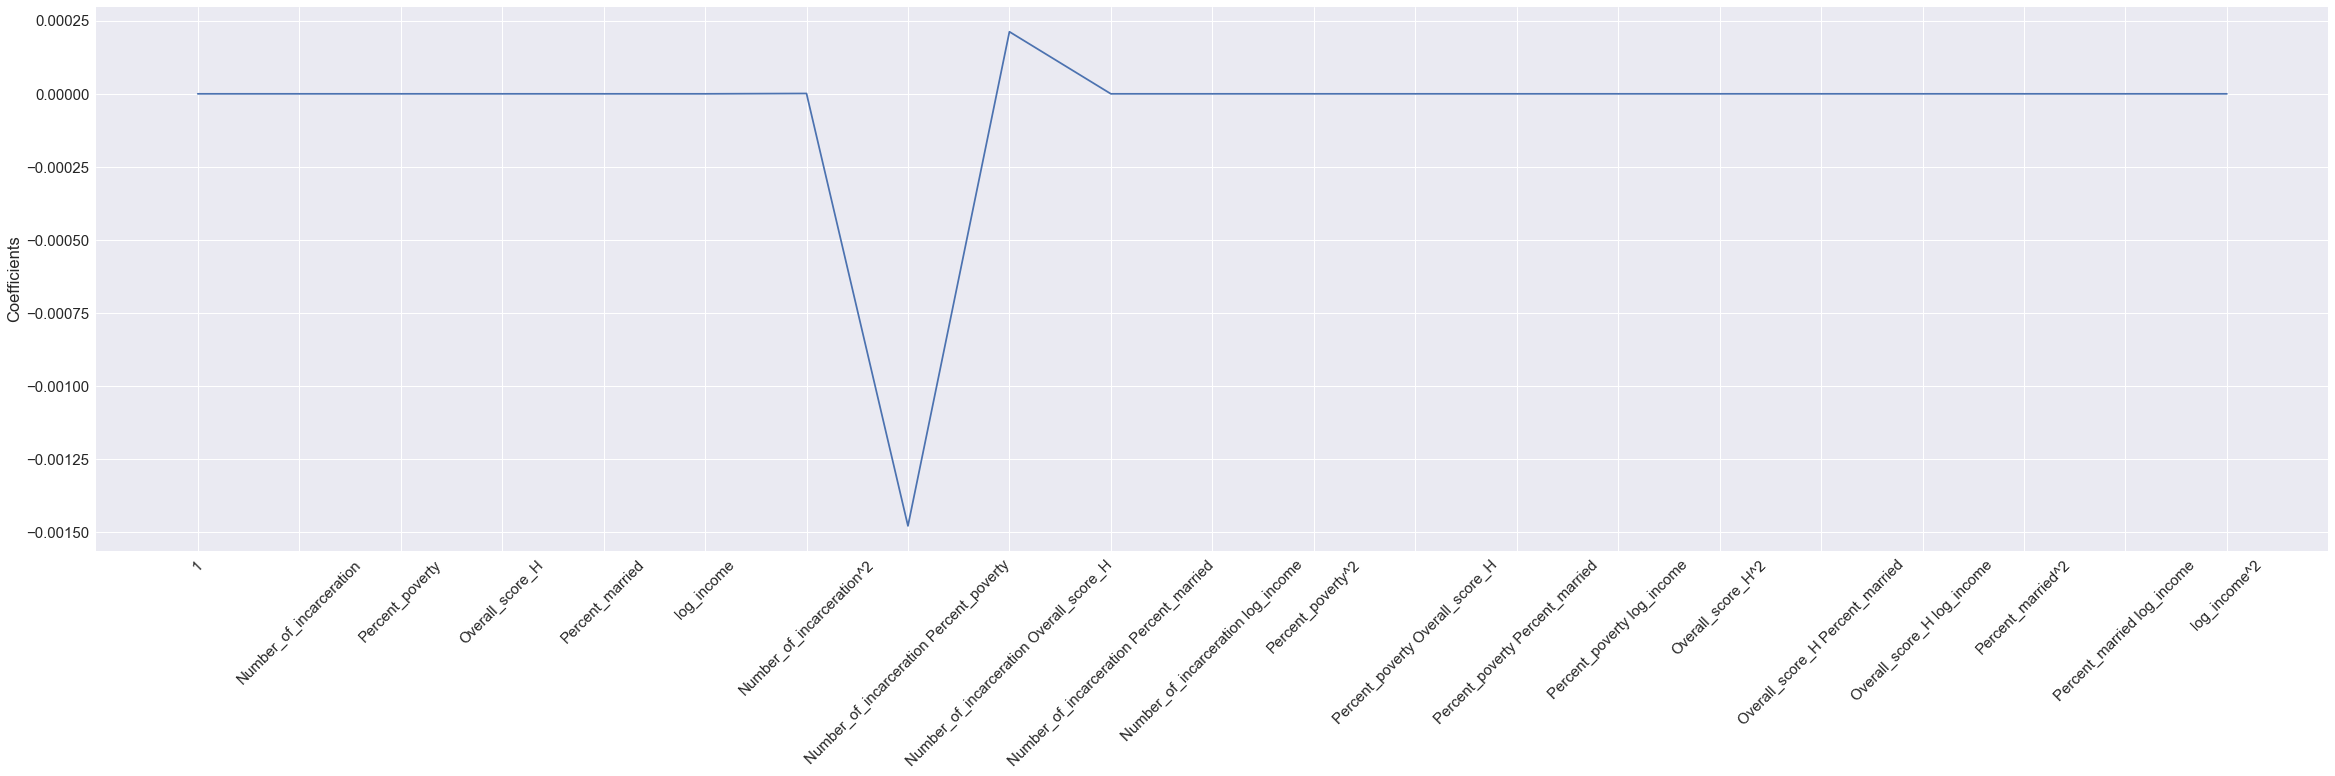

In [33]:
from sklearn.linear_model import ElasticNetCV

A = [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5]

elt = ElasticNetCV(l1_ratio = [0.01, .025, .05,.1, .5, .7, .9, .95, .99], cv = 15)

elt.fit(X_ttrain, y_ttrain)

r2 = elt.score(X_ttrain,y_ttrain)
y = np.trim_zeros(elt.fit(X_ttrain, y_ttrain).coef_)
r2_adj =  1 - (1-r2)*(X_ttrain.shape[1]-1)/(X_ttrain.shape[1]-len(y)-1)
rmse = sqrt(mean_squared_error(y_ttest, elt.predict(X_ttest)))

print('alpha:',elt.alpha_,' ratio:',elt.l1_ratio_)
print('r^2:',r2,'adj r^2:',r2_adj)
print('rmse:',rmse)

elt_coef = elt.fit(X_ttrain, y_ttrain).coef_
_ = plt.figure(figsize=(40,10))
_ = plt.plot(range(len(X_ttrain.columns)), elt_coef)
_ = plt.xticks(range(len(X_ttrain.columns)), X_ttrain.columns, rotation=45)
_ = plt.ylabel('Coefficients')

In [115]:
C = elt.fit(X_ttrain, y_ttrain).coef_
L = list(X_ttrain.columns.values)

for i in range(len(C)):
    if C[i] != 0:
        print(C[i])
        print(L[i])

1.200019330544458e-06
Number_of_incarceration^2
-0.001478079838045711
Number_of_incarceration Percent_poverty
0.0002124145394501309
Number_of_incarceration Overall_score_H


# Framing data for presentation

In [102]:
df_mod = df_overall_score.copy()

In [103]:
df_mod = df_mod.reset_index()

In [104]:
df_mod = df_mod.reset_index()

In [105]:
df_mod.rename(index=str, columns={'index' : 'School_rank'}, inplace = True)

In [106]:
df_mod = df_mod.sort_values(by=['Number_of_incarceration']).reset_index(drop = True)
df_mod = df_mod.reset_index()
df_mod.rename(index=str, columns={'index' : 'Inc_rank'}, inplace = True)

In [107]:
df_mod = df_mod.sort_values(by=['Percent_poverty']).reset_index(drop = True)
df_mod = df_mod.reset_index()
df_mod.rename(index=str, columns={'index' : 'Poverty_rank'}, inplace = True)

In [108]:
df_mod = df_mod.sort_values(by=['Overall_score_H'],ascending = False).reset_index(drop = True)
df_mod = df_mod.reset_index()
df_mod.rename(index=str, columns={'index' : 'Health_rank'}, inplace = True)
df_mod

,Health_rank,Poverty_rank,Inc_rank,School_rank,State,Overall_score,Number_of_incarceration,Percent_poverty,Overall_score_H,Percent_married,log_income
0,0,7,7,36,Hawaii,47.23,510,11.5,67.36,50,11.204850
1,1,13,9,8,Iowa,61.06,530,12.3,66.62,51,10.910277
2,2,6,1,6,Minnesota,62.68,380,11.4,66.62,56,11.058606
3,3,0,5,2,NewHampshire,64.65,460,9.2,65.54,53,11.160570
4,4,2,13,7,Connecticut,61.31,620,10.8,64.84,51,11.175297
5,5,20,26,34,SouthDakota,47.40,820,14.1,63.89,49,10.878368
6,6,12,4,4,Vermont,64.09,410,12.2,63.87,49,10.950631
7,7,8,2,0,Massachusetts,78.16,400,11.7,63.36,52,11.165182
8,8,22,3,24,RhodeIsland,52.96,400,14.8,63.23,44,10.969456
9,9,1,16,18,Maryland,54.79,710,10.4,63.05,46,11.236473


In [109]:
df_mod = df_mod.sort_values(by=['Percent_married'],ascending = False).reset_index(drop = True)
df_mod = df_mod.reset_index()
df_mod.rename(index=str, columns={'index' : 'Marry_rank'}, inplace = True)
df_mod

,Marry_rank,Health_rank,Poverty_rank,Inc_rank,School_rank,State,Overall_score,Number_of_incarceration,Percent_poverty,Overall_score_H,Percent_married,log_income
0,0,13,9,12,16,Utah,55.95,620,11.8,61.56,57,11.049492
1,1,2,6,1,6,Minnesota,62.68,380,11.4,66.62,56,11.058606
2,2,21,3,10,1,NewJersey,66.92,540,11.1,56.43,54,11.187500
3,3,3,0,5,2,NewHampshire,64.65,460,9.2,65.54,53,11.160570
4,4,7,8,2,0,Massachusetts,78.16,400,11.7,63.36,52,11.165182
5,5,1,13,9,8,Iowa,61.06,530,12.3,66.62,51,10.910277
6,6,4,2,13,7,Connecticut,61.31,620,10.8,64.84,51,11.175297
7,7,29,23,28,33,Idaho,47.44,860,14.8,53.25,51,10.784669
8,8,0,7,7,36,Hawaii,47.23,510,11.5,67.36,50,11.204850
9,9,18,16,22,3,Wisconsin,64.25,780,13.2,57.80,50,10.926622


In [110]:
df_mod = df_mod.sort_values(by=['log_income'],ascending = False).reset_index(drop = True)
df_mod = df_mod.reset_index()
df_mod.rename(index=str, columns={'index' : 'Income_rank'}, inplace = True)
df_mod

,Income_rank,Marry_rank,Health_rank,Poverty_rank,Inc_rank,School_rank,State,Overall_score,Number_of_incarceration,Percent_poverty,Overall_score_H,Percent_married,log_income
0,0,24,9,1,16,18,Maryland,54.79,710,10.4,63.05,46,11.236473
1,1,8,0,7,7,36,Hawaii,47.23,510,11.5,67.36,50,11.204850
2,2,25,45,5,33,42,Alaska,38.20,940,11.4,40.64,45,11.203066
3,3,2,21,3,10,1,NewJersey,66.92,540,11.1,56.43,54,11.187500
4,4,6,4,2,13,7,Connecticut,61.31,620,10.8,64.84,51,11.175297
5,5,4,7,8,2,0,Massachusetts,78.16,400,11.7,63.36,52,11.165182
6,6,3,3,0,5,2,NewHampshire,64.65,460,9.2,65.54,53,11.160570
7,7,18,17,10,31,5,Virginia,63.77,910,11.8,58.18,48,11.101372
8,8,21,22,31,19,27,California,51.45,750,16.4,56.14,47,11.074421
9,9,19,23,15,11,23,Washington,53.36,550,13.2,55.89,48,11.068652


In [111]:
df_mod.sort_values(by=['School_rank'],ascending = True)

,Income_rank,Marry_rank,Health_rank,Poverty_rank,Inc_rank,School_rank,State,Overall_score,Number_of_incarceration,Percent_poverty,Overall_score_H,Percent_married,log_income
5,5,4,7,8,2,0,Massachusetts,78.16,400,11.7,63.36,52,11.165182
3,3,2,21,3,10,1,NewJersey,66.92,540,11.1,56.43,54,11.187500
6,6,3,3,0,5,2,NewHampshire,64.65,460,9.2,65.54,53,11.160570
21,21,9,18,16,22,3,Wisconsin,64.25,780,13.2,57.80,50,10.926622
18,18,11,6,12,4,4,Vermont,64.09,410,12.2,63.87,49,10.950631
7,7,18,17,10,31,5,Virginia,63.77,910,11.8,58.18,48,11.101372
11,11,1,2,6,1,6,Minnesota,62.68,380,11.4,66.62,56,11.058606
4,4,6,4,2,13,7,Connecticut,61.31,620,10.8,64.84,51,11.175297
22,22,5,1,13,9,8,Iowa,61.06,530,12.3,66.62,51,10.910277
27,27,26,12,19,0,9,Maine,59.93,350,14.0,62.20,45,10.849221


# Summary of results

Steps

# Next Steps

Steps

# Appendix - Misc Code

Random code dump

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
result_index = result_mod.set_index('State')

SyntaxError: invalid syntax (<ipython-input-22-181e99765b13>, line 1)

In [23]:
p = PolynomialFeatures(degree=2).fit(result_index)
print(p.get_feature_names(result_index.columns))
features = pd.DataFrame(p.transform(result_index), columns=p.get_feature_names(result_index.columns))
features

NameError: name 'result_index' is not defined

# Notes from class

Root mean square error